In [1]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

2022-02-16 20:19:22.450081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-16 20:19:22.450135: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
ds_preview, info = tfds.load("penguins/processed", split=["train[:20%]", "train[20%:]"], as_supervised=True, with_info=True)

2022-02-16 22:31:43.385357: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/334 [00:00<?, ? examples/s]

Shuffling /home/calixto/tensorflow_datasets/penguins/processed/1.0.0.incomplete3M5X0A/penguins-train.tfrecord*…

Dataset penguins downloaded and prepared to /home/calixto/tensorflow_datasets/penguins/processed/1.0.0. Subsequent calls will reuse this data.


In [14]:
ds_test = ds_preview[0]
ds_train = ds_preview[1]
assert isinstance(ds_test, tf.data.Dataset)

In [15]:
info.features

FeaturesDict({
    'features': Tensor(shape=(4,), dtype=tf.float32),
    'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})

In [16]:
df_test = tfds.as_dataframe(ds_test.take(5), info)
df_test

2022-02-16 22:35:14.072089: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


,features,species
0,"ndarray(shape=(4,), dtype=float32)",2
1,"ndarray(shape=(4,), dtype=float32)",2
2,"ndarray(shape=(4,), dtype=float32)",2
3,"ndarray(shape=(4,), dtype=float32)",2
4,"ndarray(shape=(4,), dtype=float32)",2


In [17]:
df_train = tfds.as_dataframe(ds_train.take(5), info)
df_train

2022-02-16 22:35:56.675243: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


,features,species
0,"ndarray(shape=(4,), dtype=float32)",0
1,"ndarray(shape=(4,), dtype=float32)",2
2,"ndarray(shape=(4,), dtype=float32)",1
3,"ndarray(shape=(4,), dtype=float32)",0
4,"ndarray(shape=(4,), dtype=float32)",0


In [18]:
ds_train_batch = ds_train.batch(32)

In [19]:
features, labels = next(iter(ds_train_batch))

2022-02-16 22:38:36.643408: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [20]:
features

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[0.49818182, 0.6904762 , 0.42372882, 0.4027778 ],
       [0.48      , 0.07142857, 0.6440678 , 0.44444445],
       [0.7236364 , 0.9047619 , 0.6440678 , 0.5833333 ],
       [0.34545454, 0.5833333 , 0.33898306, 0.3472222 ],
       [0.10909091, 0.75      , 0.3559322 , 0.41666666],
       [0.6690909 , 0.63095236, 0.47457626, 0.19444445],
       [0.8036364 , 0.9166667 , 0.4915254 , 0.44444445],
       [0.4909091 , 0.75      , 0.37288135, 0.22916667],
       [0.33454546, 0.85714287, 0.37288135, 0.2361111 ],
       [0.32      , 0.41666666, 0.2542373 , 0.1388889 ],
       [0.41454545, 0.5952381 , 0.5084746 , 0.19444445],
       [0.14909092, 0.48809522, 0.2542373 , 0.125     ],
       [0.23636363, 0.4642857 , 0.27118644, 0.05555556],
       [0.22181818, 0.5952381 , 0.22033899, 0.3472222 ],
       [0.24727273, 0.5595238 , 0.15254237, 0.25694445],
       [0.63272727, 0.35714287, 0.88135594, 0.8194444 ],
       [0.47272727, 0.15476191, 0.64406

In [21]:
labels

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 0])>

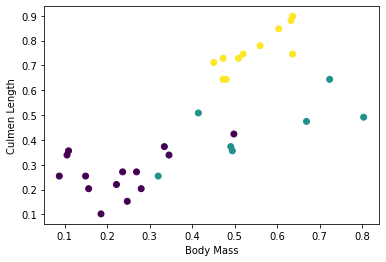

In [23]:
plt.scatter(features[:,0], features[:,2], c=labels, cmap="viridis")
plt.xlabel("Body Mass")
plt.ylabel("Culmen Length")
plt.show()